In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("PEN.csv")
df.head()

,School Year,Title,Author,Secondary Author(s),Illustrator(s),Translator(s),Series Name,State,District,Ban Date,Ban Status,Origin of Challenge
0,2021-22,Sloppy Firsts (Jessica Darling Series),"McCafferty, Megan",NaN,NaN,NaN,NaN,Florida,Walton County School District,Apr-22,Banned Pending Investigation,Administrator
1,2021-22,Outlander (Outlander Series),"Gabaldon, Diana",NaN,NaN,NaN,NaN,Florida,Walton County School District,Apr-22,Banned Pending Investigation,Administrator
2,2021-22,Gender Queer: A Memoir,"Kobabe, Maia",NaN,NaN,NaN,NaN,Florida,Osceola County School District,Apr-22,Banned Pending Investigation,Administrator
3,2021-22,The Family Fletcher Takes Rock Island (Family ...,"Levy, Dana Alison",NaN,NaN,NaN,NaN,Florida,Jackson County School District,Apr-22,Banned in Libraries and Classrooms,Administrator
4,2021-22,Thirteen Reasons Why,"Asher, Jay",NaN,NaN,NaN,NaN,Florida,Santa Rosa County District Schools,Apr-22,Banned Pending Investigation,Administrator


In [12]:
total_books = len(df)
print("Total books:", total_books)

Total books: 22659


In [13]:
unique_states = df["State"].nunique()
print("Unique states:", unique_states)


Unique states: 45


In [20]:
import re

def normalize_date(val):
    if pd.isna(val):
        return val
    val = str(val).strip()
    # Convert formats like "Sep-22" → "Sep 2022"
    if re.match(r"^[A-Za-z]{3}-\d{2}$", val):
        month, year = val.split("-")
        val = f"{month} 20{year}"
    return val

df["Ban Date"] = df["Ban Date"].apply(normalize_date)
df["Ban Date"] = pd.to_datetime(df["Ban Date"], errors="coerce")


In [21]:
df["Ban Date"] = pd.to_datetime(df["Ban Date"], errors="coerce")


In [16]:
print(df.columns)


Index(['School Year', 'Title', 'Author', 'Secondary Author(s)',
       'Illustrator(s)', 'Translator(s)', 'Series Name', 'State', 'District',
       'Ban Date', 'Ban Status', 'Origin of Challenge'],
      dtype='object')


In [24]:
earliest = df["Ban Date"].min()
latest = df["Ban Date"].max()
print("Date range:", earliest, "to", latest)


Date range: 2023-07-01 00:00:00 to 2025-06-01 00:00:00


In [18]:
top5 = df["Title"].value_counts().head(5)
print("Top 5 most-banned books:")
print(top5)


Top 5 most-banned books:
Title
Looking for Alaska                 147
Nineteen Minutes                   142
Sold                               136
The Perks of Being a Wallflower    135
Thirteen Reasons Why               126
Name: count, dtype: int64


In [35]:
import sys
sys.path.append('../../scripts')  # go from data/raw → google_trends_analysis → scripts

from script import get_trends_data  # import the function from your Python script

In [47]:
csv_path = 'data.csv'
df = pd.read_csv(csv_path)

In [58]:
import pandas as pd
from datetime import datetime
import re

def normalize_month_year_safe(date_str):
    """Normalize month-year strings to YYYY-MM-DD, robust to extra spaces or invisible chars"""
    if pd.isna(date_str):
        return None
    
    # Remove extra spaces, non-breaking spaces, and weird characters
    date_str = re.sub(r"[\u00A0]", " ", date_str)  # replace non-breaking spaces
    date_str = date_str.strip()                     # remove leading/trailing spaces
    
    # Try full month name
    try:
        dt = datetime.strptime(date_str, "%B %Y")
        return dt.strftime("%Y-%m-%d")
    except:
        pass
    
    # Try abbreviated month
    try:
        dt = datetime.strptime(date_str, "%b %Y")
        return dt.strftime("%Y-%m-%d")
    except:
        print(f"⚠ Could not parse date: {date_str}")
        return None

# Apply to your dataframe
df['Ban Date Normalized'] = df['Ban Date'].apply(normalize_month_year_safe)

# Keep only rows with valid dates
df_clean = df.dropna(subset=['Ban Date Normalized', 'Title', 'State'])

print(f"{len(df_clean)} books ready for testing")
print(df_clean[['Title', 'Ban Date', 'Ban Date Normalized', 'State']].head(10))




⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: July 2024-June 2025
⚠ Could not parse date: 24-25
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse date: 2024-2025
⚠ Could not parse da

In [59]:
def pick_random_books(df, n=10, seed=42):
    np.random.seed(seed)
    sample_df = df.sample(n=n)
    return list(zip(sample_df['Title'], sample_df['Ban Date Normalized'], sample_df['State']))

test_books = pick_random_books(df_clean)
print(test_books)



[('Filippo Lippi', '2025-04-01', 'Tennessee'), ('The Mist', '2025-06-01', 'Florida'), ('Last Night at the Telegraph Club', '2025-04-01', 'Tennessee'), ('Wonders of the Invisible World', '2024-12-01', 'Florida'), ('Dragon Ball, Vol. 5', '2025-05-01', 'Tennessee'), ('The End and Other Beginnings: Stories from the Future', '2025-02-01', 'Tennessee'), ('Echo After Echo', '2024-12-01', 'Florida'), ('Song of Solomon', '2025-06-01', 'Florida'), ('Winterkeep', '2025-05-01', 'Florida'), ('Slaughterhouse-Five', '2024-11-01', 'Texas')]


In [62]:
from script import get_trends_data
import pandas as pd

results = []

for title, ban_date, state in test_books:
    print(f"Collecting data for: {title} ({state}) on {ban_date}")
    
    result = get_trends_data(title, ban_date)
    
    # Only append if the data was collected successfully
    if result:
        result['state'] = state
        results.append(result)
    else:
        print(f"⚠ Data collection failed for: {title}")

# Convert results to DataFrame and save to CSV
test_df = pd.DataFrame(results)
test_df.to_csv('test_results.csv', index=False)
print("✓ Test results saved to test_results.csv")



✓ Test results saved to test_results.csv


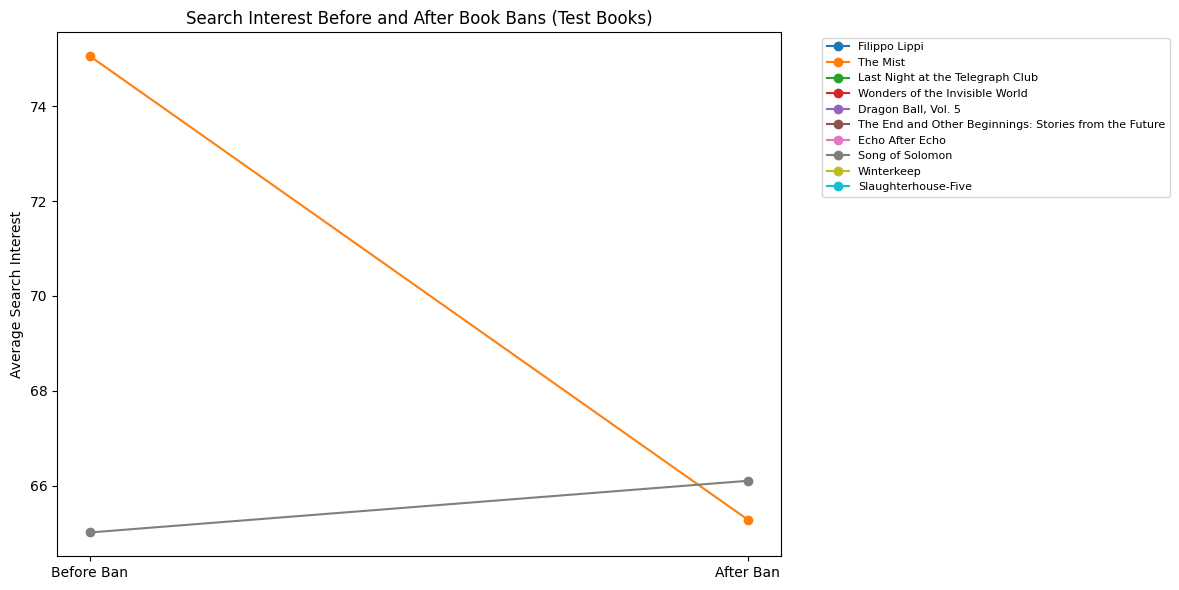

In [63]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Loop over each book and plot its before/after values
for idx, row in test_df.iterrows():
    # x-axis: Before vs After
    x = ['Before Ban', 'After Ban']
    # y-axis: average search interest
    y = [row['avg_search_before'], row['avg_search_after']]
    
    # Plot a line for this book
    plt.plot(x, y, marker='o', label=row['book_title'])

# Add labels and title
plt.ylabel('Average Search Interest')
plt.title('Search Interest Before and After Book Bans (Test Books)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # legend outside plot

# Show the plot
plt.tight_layout()
plt.show()
